# K- Nearest Neighbours

In [45]:
#Importing Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
#importing the dataset

defaulter = pd.read_csv('E:/31-08-2024/Desktop/Projects/Machine Learning/K_NN/k Nearest Neighbours/datasets/defaulter.csv')

In [12]:
defaulter.head()

,defaulter,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [13]:
defaulter.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


In [14]:
defaulter["balance"].value_counts()

balance
0.000000       499
134.624041       1
1183.452815      1
1849.603666      1
391.482079       1
              ... 
1959.595520      1
1706.953766      1
1255.883711      1
537.954409       1
200.922183       1
Name: count, Length: 9502, dtype: int64

In [15]:
defaulter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   defaulter  10000 non-null  object 
 1   student    10000 non-null  object 
 2   balance    10000 non-null  float64
 3   income     10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


Normalizing the data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()
features_to_transform = ["balance","income"]
scaled_values = scaler.fit_transform(defaulter[features_to_transform])
defaulter["norm_balance"] = scaled_values[:,0]
defaulter["norm_income"] = scaled_values[:,1]


In [28]:
defaulter.head()

,defaulter,student,balance,income,norm_balance,norm_income
0,No,No,729.526495,44361.62507,0.274845,0.598905
1,No,Yes,817.180407,12106.13470,0.307868,0.155727
2,No,No,1073.549164,31767.13895,0.404453,0.425862
3,No,No,529.250605,35704.49394,0.199392,0.479959
4,No,No,785.655883,38463.49588,0.295991,0.517867


# Splitting the data into Train and Test set

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = defaulter[["norm_balance","norm_balance"]]

In [31]:
Y = defaulter["defaulter"]

In [32]:
print(X.shape,Y.shape)

(10000, 2) (10000,)


In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 100)

In [35]:
X_train.shape,Y_train.shape

((8000, 2), (8000,))

# Building KNN Model using SKLEARN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
# K=3

model = KNeighborsClassifier(n_neighbors =  3,metric = "euclidean")
model.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

Evaluating the accuracy of train and test data

In [40]:
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)

print(train_accuracy,test_accuracy)

0.9775 0.9695


Performance measured on different values of k

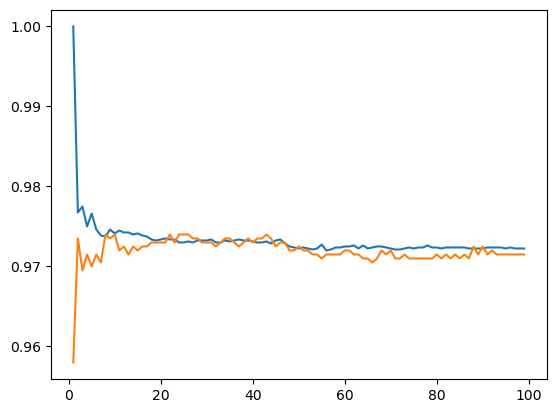

In [46]:
train_accuracies = []
test_accuracies = []

k_vals = [i for i in range(1,100)]
features = ["norm_balance","norm_income"]
target = "defaulter"

for k in k_vals:
    model = KNeighborsClassifier(n_neighbors = k,metric = "euclidean")
    model.fit(X_train,Y_train)
    train_accuracy_k = model.score(X_train,Y_train)
    test_accuracy_k = model.score(X_test,Y_test)
    train_accuracies.append(train_accuracy_k)
    test_accuracies.append(test_accuracy_k)

plt.plot(k_vals,train_accuracies)
plt.plot(k_vals,test_accuracies)